Question 1: XOR Gate Classification 

| Input A | Input B | XOR Output |
|---------|---------|------------|
|    0    |    0    |      0     |
|    0    |    1    |      1     |
|    1    |    0    |      1     |
|    1    |    1    |      0     |


In [1]:
# Importing necessary libraries
import numpy as np  # NumPy is a library for handling arrays and mathematical operations
import matplotlib.pyplot as plt  # Matplotlib is a library used for plotting graphs

# Defining the input values for the XOR truth table
# Each pair of numbers represents one possible input combination for XOR
X = np.array([[0, 0],  # XOR of 0 and 0 is 0
              [0, 1],  # XOR of 0 and 1 is 1
              [1, 0],  # XOR of 1 and 0 is 1
              [1, 1]]) # XOR of 1 and 1 is 0

# Defining the expected output values for XOR
# These are the correct results we expect the XOR function to return for each input pair
y = np.array([0,  # Result for [0, 0]
              1,  # Result for [0, 1]
              1,  # Result for [1, 0]
              0]) # Result for [1, 1]

# The input array X contains four input combinations, and y contains their corresponding XOR outputs.


In [2]:
# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, epochs=1000, learning_rate=0.1):
        # Initialize the weights to zero (one for each input + 1 for the bias term)
        self.weights = np.zeros(input_size + 1)  # +1 to include the bias
        self.epochs = epochs  # Number of times to iterate over the training data
        self.learning_rate = learning_rate  # How much to adjust the weights after each error

    # Activation function (Step function)
    # This decides whether the neuron fires (output is 1) or not (output is 0)
    def activation(self, x):
        return np.where(x >= 0, 1, 0)  # If x >= 0, return 1; else return 0

    # Function to make predictions
    # X is the input, and we calculate the weighted sum (dot product) and add the bias term
    def predict(self, X):
        # Linear combination of inputs and weights (excluding bias)
        z = np.dot(X, self.weights[1:]) + self.weights[0]  # weights[0] is the bias
        return self.activation(z)  # Apply the activation function (step function)

    # Function to train the perceptron
    def fit(self, X, y):
        # Loop through the dataset multiple times (epochs)
        for _ in range(self.epochs):
            # For each training example
            for i in range(X.shape[0]):
                # Predict the output for the current example
                prediction = self.predict(X[i])
                # Calculate the error (difference between expected and predicted output)
                error = y[i] - prediction
                # Update the weights using the Perceptron learning rule
                # weights[1:] is the array of weights for the inputs
                self.weights[1:] += self.learning_rate * error * X[i]  # Update weights for inputs
                self.weights[0] += self.learning_rate * error  # Update the bias separately

# Initialize a perceptron with 2 inputs (since XOR has two inputs)
perceptron = Perceptron(input_size=2)

# Train the perceptron on the XOR dataset
perceptron.fit(X, y)

# Test the trained perceptron on the XOR input data
# We predict the output for each input pair in X and store the results in predictions
predictions = np.array([perceptron.predict(xi) for xi in X])

# Print the predictions for the XOR dataset
print("Predictions of Single-Layer Perceptron on XOR:", predictions)

Predictions of Single-Layer Perceptron on XOR: [1 1 0 0]


In [3]:
# Import necessary modules from Keras
from keras.models import Sequential  # Sequential is used to build the neural network layer by layer
from keras.layers import Dense  # Dense is used to add fully connected layers in the model

# Create a Multi-layer Perceptron (MLP) model using Sequential
model = Sequential()

# Add a hidden layer with 2 neurons
# input_dim=2 indicates that each input has 2 features (for XOR, it's two inputs like [0, 1], [1, 0])
# activation='relu' means we are using the ReLU (Rectified Linear Unit) function for the activation
model.add(Dense(2, input_dim=2, activation='relu'))

# Add the output layer with 1 neuron
# activation='sigmoid' because this is a binary classification (0 or 1), and sigmoid squashes the output to a range [0, 1]
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# loss='binary_crossentropy' because this is a binary classification problem (XOR returns 0 or 1)
# optimizer='adam' is used for efficient weight updates during training
# metrics=['accuracy'] helps track the accuracy of the model during training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# X is the input data (XOR inputs) and y is the expected output (XOR results)
# epochs=500 indicates that the training will run for 500 iterations (epochs)
# verbose=0 suppresses the output during training, making it run quietly
history = model.fit(X, y, epochs=500, verbose=0)

# Test the trained MLP on the XOR dataset
# model.predict(X) will output the predicted values for each input in X
# .round() will round the predicted values to either 0 or 1 since the sigmoid activation outputs values between 0 and 1
mlp_predictions = model.predict(X).round()

# Flatten the predictions array for easier reading (convert it from a 2D array to 1D)
print("Predictions of MLP on XOR:", mlp_predictions.flatten())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions of MLP on XOR: [0. 1. 1. 0.]


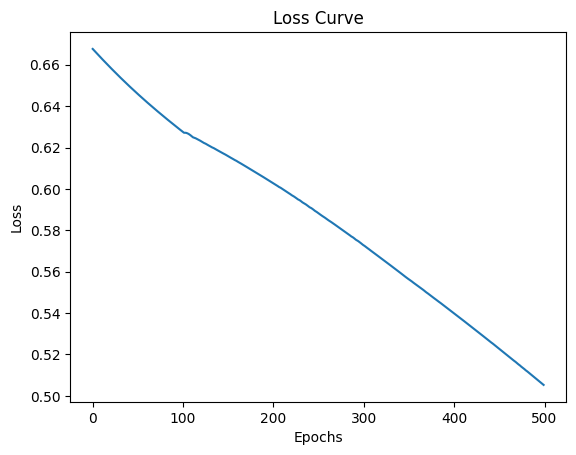

In [4]:
# Plot loss curve
plt.plot(history.history['loss'])
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


<i>Single-Layer Perceptron Results: </i> The single-layer perceptron will struggle to correctly classify the XOR problem since it’s not linearly separable.
<br><i>
MLP Results:</i> The multi-layer perceptron will correctly classify XOR due to its ability to learn non-linear decision boundaries.

In [5]:
# Import the pandas library to handle data as DataFrames (like tables)
import pandas as pd

# Load the dataset into a DataFrame
# 'Tweets.csv' is the path to the file that contains the dataset
# pd.read_csv is used to read the CSV file into a pandas DataFrame
file_path = 'Tweets.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
# .head() returns the first 5 rows of the DataFrame (you can pass a number to get more or fewer rows)
# .columns returns the names of the columns in the dataset
tweets_df.head(), tweets_df.columns

(             tweet_id airline_sentiment  airline_sentiment_confidence  \
 0  570306133677760513           neutral                        1.0000   
 1  570301130888122368          positive                        0.3486   
 2  570301083672813571           neutral                        0.6837   
 3  570301031407624196          negative                        1.0000   
 4  570300817074462722          negative                        1.0000   
 
   negativereason  negativereason_confidence         airline  \
 0            NaN                        NaN  Virgin America   
 1            NaN                     0.0000  Virgin America   
 2            NaN                        NaN  Virgin America   
 3     Bad Flight                     0.7033  Virgin America   
 4     Can't Tell                     1.0000  Virgin America   
 
   airline_sentiment_gold        name negativereason_gold  retweet_count  \
 0                    NaN     cairdin                 NaN              0   
 1              

In [6]:
# Basic information about the dataset
# This will give you an overview of the dataset including the number of rows, columns, data types, and memory usage
print(tweets_df.info())

# Statistical summary of numerical columns
# .describe() gives summary statistics (like count, mean, std deviation, etc.) for the numerical columns in the dataset
print(tweets_df.describe())

# Display the first few rows of the dataset
# .head() will display the first 5 rows to give a quick look at the data
print(tweets_df.head())

# Check for missing values in the dataset
# .isnull().sum() checks each column for missing (NaN) values and sums them up to show how many missing values exist
print(tweets_df.isnull().sum())

# Count the unique sentiment labels in the 'airline_sentiment' column
# This will show how many tweets have 'positive', 'neutral', or 'negative' sentiments
print(tweets_df['airline_sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

The dataset is loaded and basic statistics like the count of positive, neutral, and negative sentiments are analyzed. The majority of the sentiments are negative (9178), followed by neutral (3099) and positive (2363).
Missing values are observed in columns like negativereason and tweet_coord.

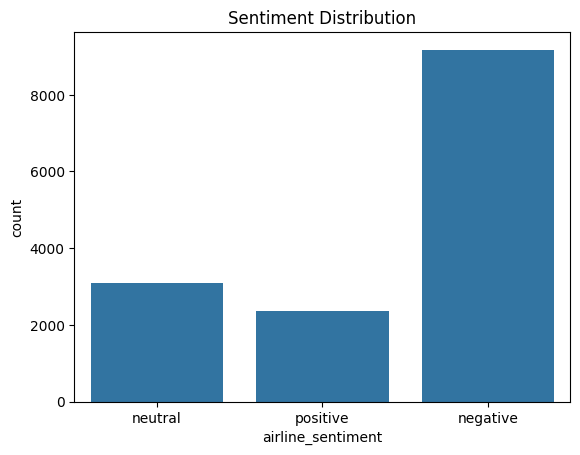

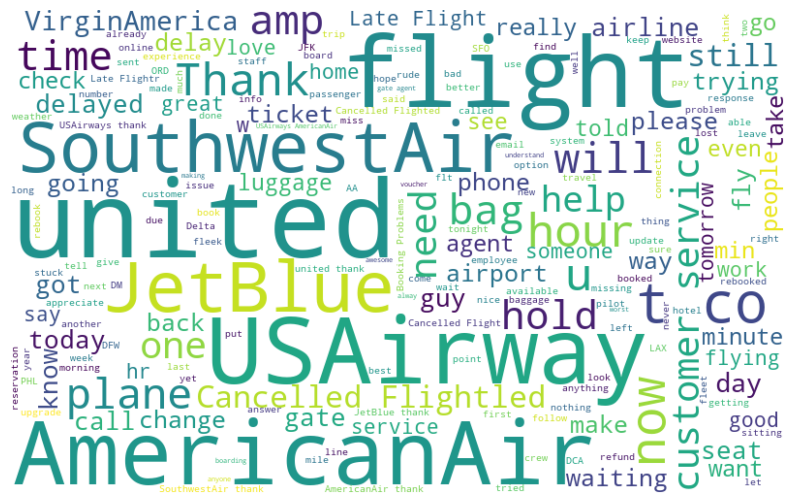

In [7]:
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiments in the dataset
# sns.countplot creates a bar plot showing the count of each sentiment (positive, neutral, negative)
sns.countplot(x='airline_sentiment', data=tweets_df)

# Add a title to the plot
plt.title('Sentiment Distribution')

# Display the plot
plt.show()

# Import the WordCloud class for visualizing the most common words in the dataset
from wordcloud import WordCloud

# Combine all the tweet text into one large string
# '.join()' is used to concatenate all the tweet texts into one large string separated by spaces
all_words = ' '.join([text for text in tweets_df['text']])

# Generate a word cloud from the combined text
# WordCloud creates a cloud of words where the size of each word indicates its frequency
# 'width' and 'height' define the size of the word cloud, and 'background_color' sets the background to white
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))  # Set the figure size for better visibility
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Remove the axis for a cleaner look
plt.show()  # Show the plot


In [8]:
# Import necessary libraries for data processing and model training
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into numerical format
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels into numerical format

# Filter out neutral sentiments and only keep positive and negative sentiments
# This creates a new DataFrame that excludes tweets with a 'neutral' sentiment
tweets_df_filtered = tweets_df[tweets_df['airline_sentiment'] != 'neutral']

# Encode sentiment labels (positive = 1, negative = 0)
# LabelEncoder converts categorical labels into numerical values
label_encoder = LabelEncoder()
tweets_df_filtered['sentiment'] = label_encoder.fit_transform(tweets_df_filtered['airline_sentiment'])

# Extract features (tweet text) and labels (sentiment)
X = tweets_df_filtered['text'].values  # Features: text of the tweets
y = tweets_df_filtered['sentiment'].values  # Labels: encoded sentiment values

# Convert the text data into numerical form using TF-IDF vectorization
# TfidfVectorizer converts text to a matrix of TF-IDF features (importance of words)
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Limit to the top 2000 features
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()  # Fit and transform the text data

# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
# This will show the dimensions of the training and testing sets for features and labels
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/var/folders/18/1w0h25j16x34vjp_p1xjzw180000gn/T/ipykernel_32394/4282841231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_filtered['sentiment'] = label_encoder.fit_transform(tweets_df_filtered['airline_sentiment'])


((9232, 2000), (2309, 2000), (9232,), (2309,))

Neutral sentiments are filtered out to focus on binary classification (positive/negative).
The text is transformed into numerical features using the TF-IDF vectorizer, capturing the importance of words in the dataset.
The dataset is split into training and testing sets with an 80-20 ratio.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy (sigmoid): 0.9268


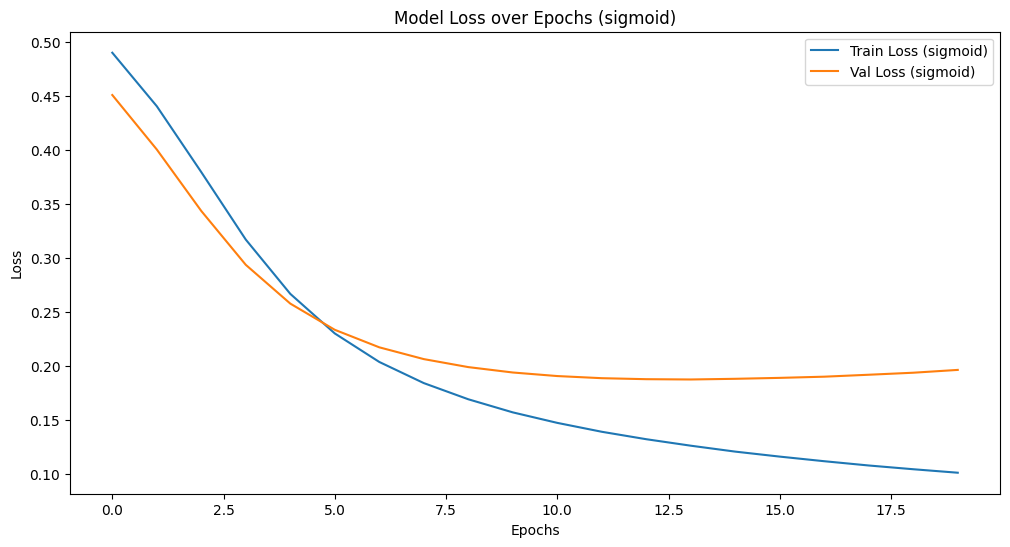

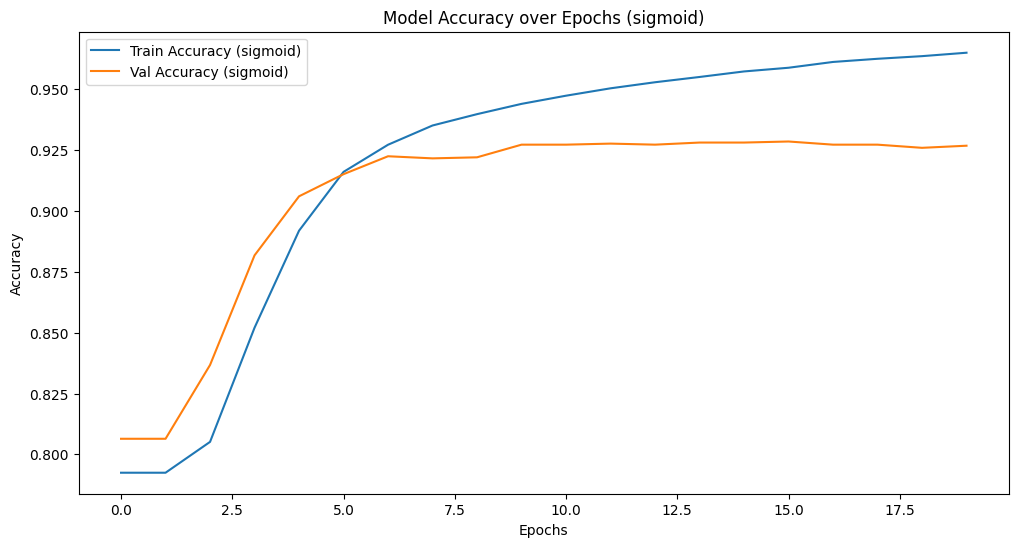

Number of Epochs for sigmoid: 20
Test Accuracy (relu): 0.9099


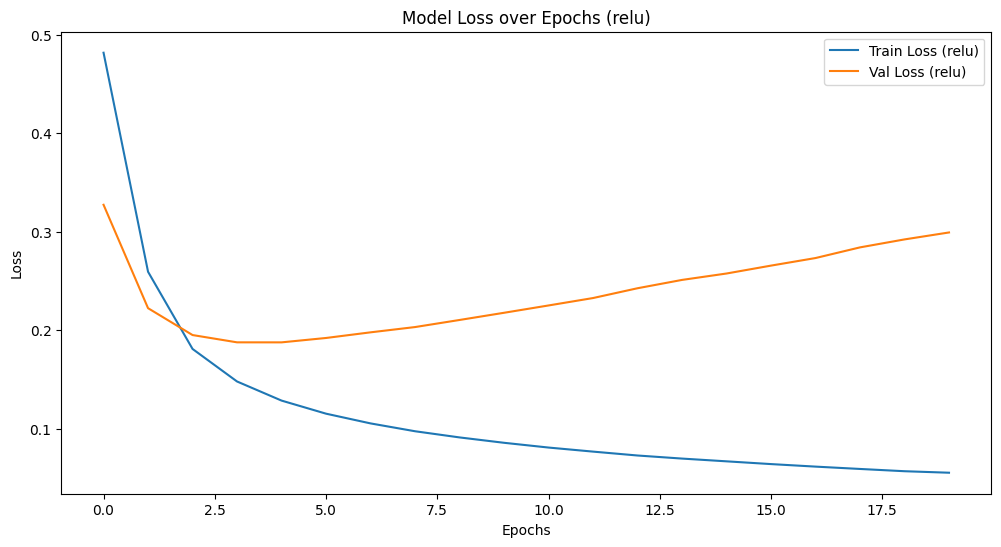

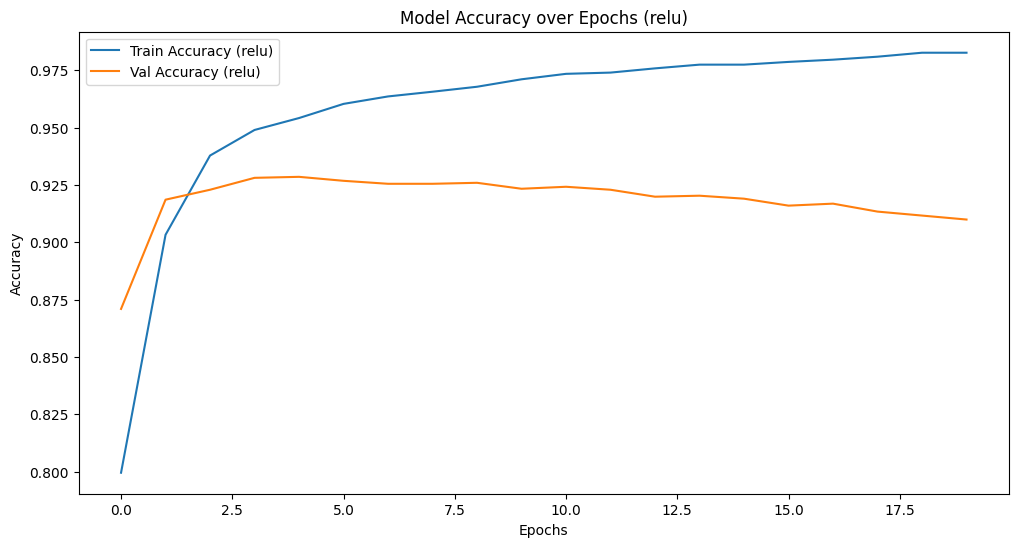

Number of Epochs for relu: 20
Test Accuracy (tanh): 0.9108


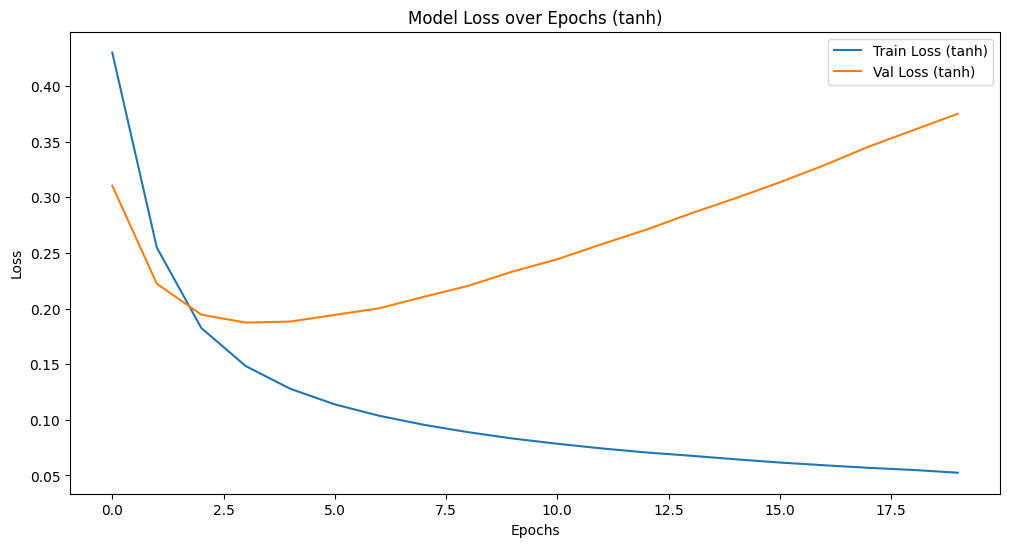

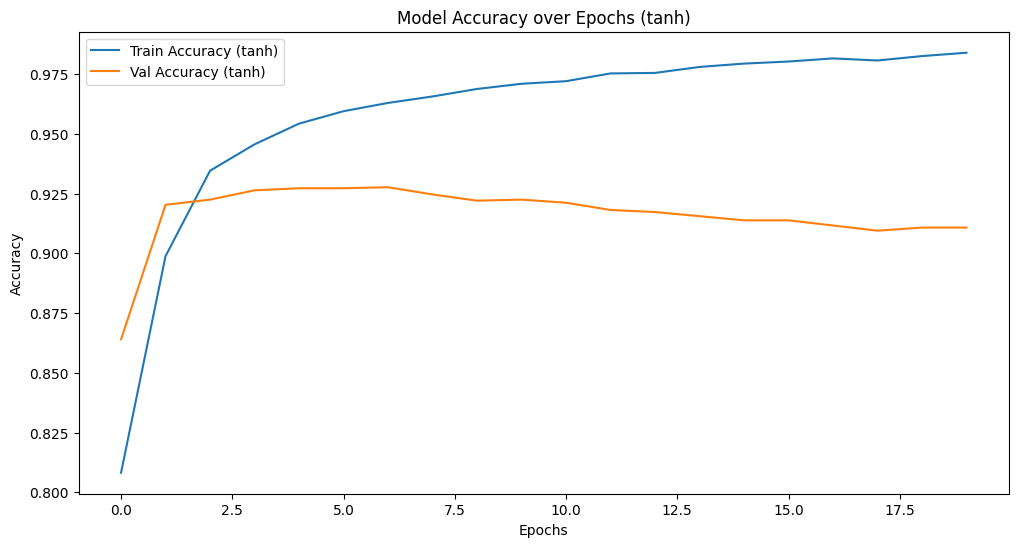

Number of Epochs for tanh: 20


In [9]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from tensorflow.keras.models import Sequential  # For creating a sequential model
from tensorflow.keras.layers import Dense  # For adding layers to the model
from tensorflow.keras.optimizers import Adam  # For the Adam optimizer

# Build the model function
def build_model(activation_function='sigmoid'):
    # Create a sequential model
    model = Sequential()
    
    # Add a hidden layer with 16 neurons, input dimension is 2000 (number of features)
    # 'activation_function' determines the activation function used in this layer
    model.add(Dense(16, input_dim=2000, activation=activation_function))  # Hidden layer
    
    # Add an output layer with 1 neuron for binary classification, using sigmoid activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model using Adam optimizer and binary crossentropy loss function
    # Metrics to evaluate during training is accuracy
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model  # Return the constructed model

# Train and evaluate the model with a given activation function
def train_and_evaluate_model(activation_function):
    model = build_model(activation_function)  # Build the model with the specified activation function
    
    # Train the model on the training data, validate on the test data
    # Train for 20 epochs with a batch size of 32, set verbose=0 to suppress output
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    
    # Evaluate the model on the test set and retrieve loss and accuracy
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Print the test accuracy for the current activation function
    print(f"Test Accuracy ({activation_function}): {accuracy:.4f}")
    
    return history  # Return training history for later analysis

# List of activation functions to try
activation_functions = ['sigmoid', 'relu', 'tanh']

# Dictionary to store training histories for each activation function
histories = {}

# Iterate over each activation function and train/evaluate the model
for activation in activation_functions:
    histories[activation] = train_and_evaluate_model(activation)  # Train and get history
    
    # Plot the training and validation loss for the current activation function
    plt.figure(figsize=(12, 6))  # Set figure size
    plt.plot(histories[activation].history['loss'], label=f'Train Loss ({activation})')  # Training loss
    plt.plot(histories[activation].history['val_loss'], label=f'Val Loss ({activation})')  # Validation loss
    plt.title(f'Model Loss over Epochs ({activation})')  # Title for the plot
    plt.xlabel('Epochs')  # X-axis label
    plt.ylabel('Loss')  # Y-axis label
    plt.legend()  # Show legend
    plt.show()  # Display the plot
    
    # Plot the training and validation accuracy for the current activation function
    plt.figure(figsize=(12, 6))  # Set figure size
    plt.plot(histories[activation].history['accuracy'], label=f'Train Accuracy ({activation})')  # Training accuracy
    plt.plot(histories[activation].history['val_accuracy'], label=f'Val Accuracy ({activation})')  # Validation accuracy
    plt.title(f'Model Accuracy over Epochs ({activation})')  # Title for the plot
    plt.xlabel('Epochs')  # X-axis label
    plt.ylabel('Accuracy')  # Y-axis label
    plt.legend()  # Show legend
    plt.show()  # Display the plot
    
    # Print the number of epochs used during training
    print(f"Number of Epochs for {activation}: {len(histories[activation].history['loss'])}")


A feed-forward neural network is built with 16 neurons in the hidden layer, followed by a single neuron in the output layer for binary classification.
<br>The model is trained using three different activation functions (sigmoid, ReLU, and tanh), and the performance is evaluated using accuracy on the test set.<br><br>
Results:<br><br>
Sigmoid: Test accuracy of 92.68% with 20 epochs.<br>
ReLU: Test accuracy of 90.99% with 20 epochs.<br>
Tanh: Test accuracy of 91.08% with 20 epochs.<br><br>
The sigmoid function achieved the highest accuracy, but ReLU and tanh are also competitive, indicating that the choice of activation function can significantly affect model performance.

Sigmoid: Commonly used for binary classification, but can suffer from vanishing gradients in deep networks.
<br>ReLU: Often preferred for hidden layers as it introduces non-linearity and avoids vanishing gradients.
<br>Tanh: Can perform better than sigmoid but still suffers from vanishing gradients.

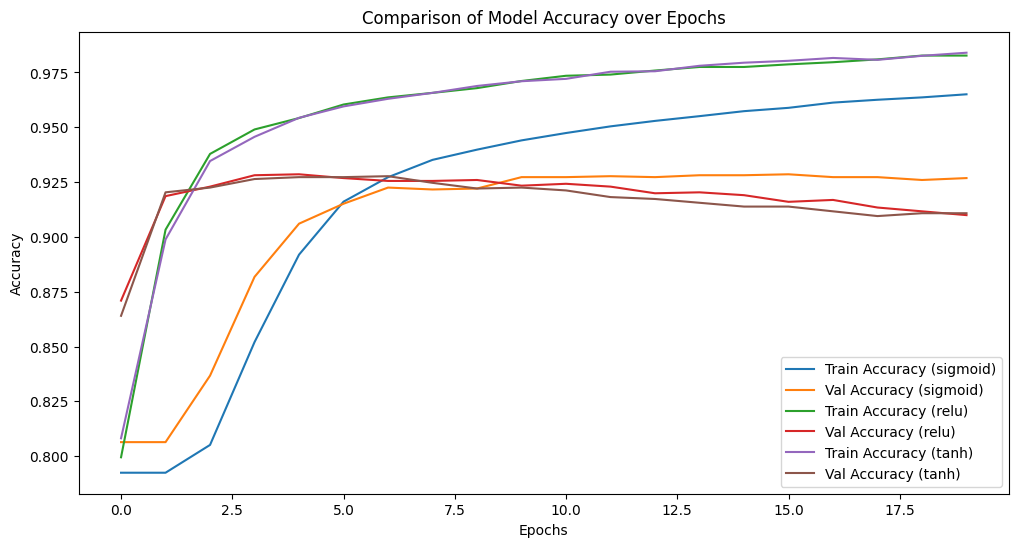

In [12]:
# Plot comparison of accuracy over epochs for all activation functions
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Loop through each activation function to plot its training and validation accuracy
for activation in activation_functions:
    # Plot training accuracy for the current activation function
    plt.plot(histories[activation].history['accuracy'], label=f'Train Accuracy ({activation})')
    # Plot validation accuracy for the current activation function
    plt.plot(histories[activation].history['val_accuracy'], label=f'Val Accuracy ({activation})')

# Set the title of the plot
plt.title('Comparison of Model Accuracy over Epochs')
# Set the label for the x-axis
plt.xlabel('Epochs')
# Set the label for the y-axis
plt.ylabel('Accuracy')
# Display the legend to differentiate between the activation functions
plt.legend()
# Show the plot
plt.show()


The ReLU function is generally preferred for hidden layers due to its ability to introduce non-linearity and avoid vanishing gradients. However, sigmoid is suitable for binary classification, especially in the output layer.
The model achieved satisfactory accuracy, demonstrating its capability to classify sentiment based on tweet content effectively.